In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.display.max_columns = None

In [3]:
data = pd.read_excel('clean.xlsx')
df = data.copy()

In [7]:
# Find the number of duplicates
df.duplicated().sum()

0

In [6]:
df.nunique()

Unnamed: 0                                 38
Sr.No.                                     38
year                                       38
Jet Fuel_avi_BTU                           37
Gasoline_avi_BTU                           37
LDV_SWB_road_BTU                           37
LDV_LWB_road_BTU                           35
Combination_Truck_road_BTU                 36
Bus_Road_BTU                               37
Railways_BTU                               37
Water_BTU                                  37
Natural_Gas_BTU                            37
Passenger_Car_EFF                          34
Domestic_EFF                               35
Imported_EFF                               30
Light_Truck_EFF                            32
LDV_SWB_EFF                                38
LDV_LWB_EFF                                37
Passenger_Car_Age                          36
Light_Truck_Age                            31
Light_vehicle_Age                          33
Demand_petroleum_transportation)mi

Questions to ask
1. Pattern overall emission per year
2. Which GHG dominate 
3. Which feature effect efficiency
4. How to maximize efficiency
5. Which transportation mode has lowest emission (contribute ghg)
6. Energy consumption effect maintanence cost?
7. Energy consumption effect emission?
8. Common pattern mode of transport over the years

In [31]:
# row with minimum emission
df.iloc[df['Jet Fuel_avi_BTU'].idxmin()]

Unnamed: 0                                      0.000000
Sr.No.                                          1.000000
year                                         1960.000000
Jet Fuel_avi_BTU                              263.790000
Gasoline_avi_BTU                               29.088400
LDV_SWB_road_BTU                             4952.283840
LDV_LWB_road_BTU                             4157.110639
Combination_Truck_road_BTU                    488.742723
Bus_Road_BTU                                   99.476522
Railways_BTU                                  475.750403
Water_BTU                                     108.118847
Natural_Gas_BTU                               359.916775
LDV_SWB_EFF                                    15.983485
LDV_LWB_EFF                                    12.226114
Passenger_Car_EFF                              24.300000
Domestic_EFF                                   22.600000
Imported_EFF                                   29.600000
Light_Truck_EFF                

Insight
- Minimum CO2 emission occur at 1970:
    1. Highest usage of gasoline aviation
    2. Second lowest usage of jet fuel

In [32]:
df.max()

Unnamed: 0                                     37.000000
Sr.No.                                         38.000000
year                                         2021.000000
Jet Fuel_avi_BTU                             1956.217500
Gasoline_avi_BTU                               66.230200
LDV_SWB_road_BTU                            11291.709467
LDV_LWB_road_BTU                             7628.195070
Combination_Truck_road_BTU                   3972.305240
Bus_Road_BTU                                  299.971076
Railways_BTU                                  575.901152
Water_BTU                                     356.514136
Natural_Gas_BTU                              1055.764515
LDV_SWB_EFF                                    25.310267
LDV_LWB_EFF                                    18.231183
Passenger_Car_EFF                              39.441726
Domestic_EFF                                   39.200000
Imported_EFF                                   39.700000
Light_Truck_EFF                

In [33]:
# row with highest emission
df.iloc[df['Gasoline_avi_BTU'].idxmax()]

Unnamed: 0                                      2.000000
Sr.No.                                          3.000000
year                                         1970.000000
Jet Fuel_avi_BTU                             1060.695000
Gasoline_avi_BTU                               66.230200
LDV_SWB_road_BTU                             8164.903979
LDV_LWB_road_BTU                             1481.134324
Combination_Truck_road_BTU                    883.853950
Bus_Road_BTU                                   98.660622
Railways_BTU                                  487.015645
Water_BTU                                     112.515039
Natural_Gas_BTU                               748.886142
LDV_SWB_EFF                                    20.324466
LDV_LWB_EFF                                    16.134621
Passenger_Car_EFF                              28.000000
Domestic_EFF                                   26.900000
Imported_EFF                                   29.900000
Light_Truck_EFF                

Insight
- Highest emission occur at 2007:
    1. Highest CO2_emission_million_metric_tons
    2. Demand_petroleum_transportation at highest range
    3. Gasoline aviation btu in lowest range
    4. Jet fuel aviation in highest range

<AxesSubplot:xlabel='year', ylabel='CO2_emission_million_metric_tons'>

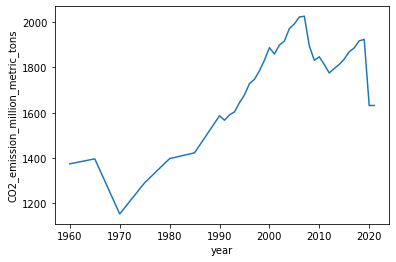

In [4]:
sns.lineplot(data=df, x="year", y="CO2_emission_million_metric_tons")

Insight
- Lowest overall emission in 1970, keep increasing until highest in 2005. Why dip at 1970?

<AxesSubplot:xlabel='year', ylabel='Average_MC/15000_miles(dollars)'>

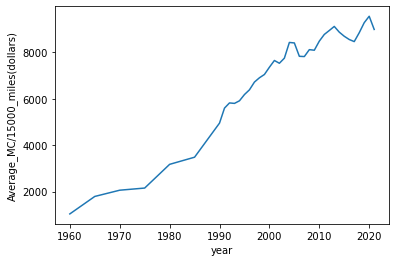

In [5]:
sns.lineplot(data=df, x="year", y="Average_MC/15000_miles(dollars)")


Insight
- Maintanance cost keep on increasing across the years

<AxesSubplot:xlabel='Passenger_Car_EFF', ylabel='Demand_petroleum_transportation)mil_lit'>

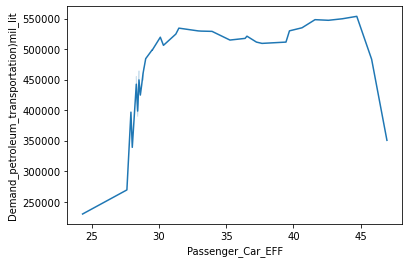

In [4]:
sns.lineplot(data=df, x="Passenger_Car_EFF", y="Demand_petroleum_transportation)mil_lit")

<AxesSubplot:xlabel='Demand_petroleum_transportation)mil_lit', ylabel='CO2_emission_million_metric_tons'>

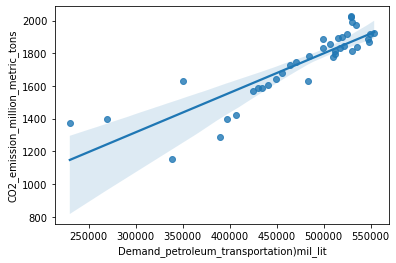

In [6]:
sns.regplot(data=df, x="Demand_petroleum_transportation)mil_lit", y="CO2_emission_million_metric_tons")

Insight
- Demand for petroleum increasing until 2017 then drop significantly. Why drop?
-It has been slowing since early 2019.
The trend has been compounded by the impact of the Covid-19 lockdown measures on the transport industry

In [ ]:
pd.pivot_table(df, index = 'year', values = ["Demand_petroleum_transportation)mil_lit"])

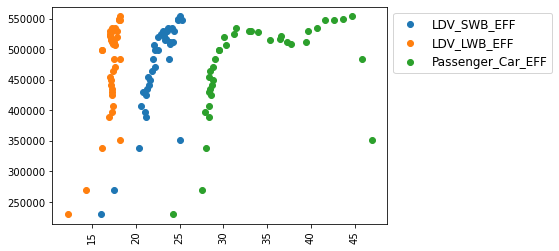

In [10]:
plt.xticks(rotation=90)
plt.scatter(x=df['LDV_SWB_EFF'], y=df["Demand_petroleum_transportation)mil_lit"])
plt.scatter(x=df['LDV_LWB_EFF'], y=df["Demand_petroleum_transportation)mil_lit"])
plt.scatter(x=df['Passenger_Car_EFF'], y=df["Demand_petroleum_transportation)mil_lit"])
classes = ['LDV_SWB_EFF', 'LDV_LWB_EFF','Passenger_Car_EFF']
plt.legend(labels=classes,loc="upper left", bbox_to_anchor=(1,1),fontsize=12)
plt.show()

Insight
- Fuel efficiency increase with Petrol demand:
    'Rebound effect' energy efficiency lowers the cost of energy, so we tend to burn more fuel because we dont have to pay more

In [4]:
# see for all emission
emission = df[['year','CO2_emission_million_metric_tons',
       'CO_emission_million_shots_tons', 'NOx_emission_million_shots_tons',
       'particulate', 'SOx_emission_million_shots_tons',
       'Volatile_compound_million_shots_tons']].set_index('year')

In [4]:
emission_avg = emission.mean()
emission_avg


CO2_emission_million_metric_tons        1732.777140
CO_emission_million_shots_tons           111.435407
NOx_emission_million_shots_tons           20.135899
particulate                               21.231808
SOx_emission_million_shots_tons           15.067158
Volatile_compound_million_shots_tons      20.686736
dtype: float64

Text(0.5, 0, 'Emission')

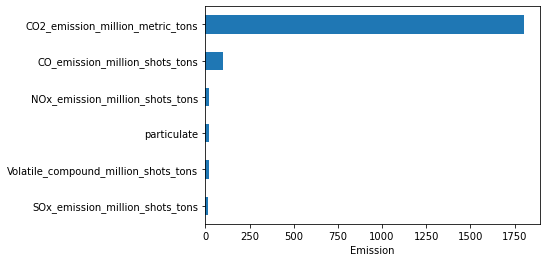

In [5]:
emission_avg = emission.median().sort_values(ascending = True)
emission_avg.plot(kind='barh')
plt.xlabel("Emission")

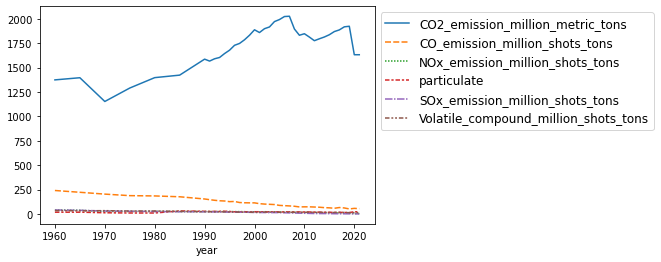

In [8]:
sns.lineplot(data=emission)
plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12)

<AxesSubplot:xlabel='Light_Truck_EFF', ylabel='CO2_emission_million_metric_tons'>

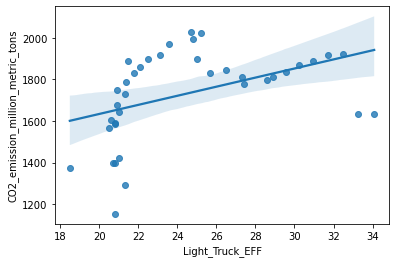

In [14]:
sns.regplot(data=df, x='Light_Truck_EFF', y='CO2_emission_million_metric_tons')

In [ ]:
sns.scatterplot(data=df, x='CO2_emission_million_metric_tons', y='Overall_emission')

In [ ]:
df['CO2_emission_million_metric_tons'].corr(df['Overall_emission'])

In [25]:
consumption = df[['Jet Fuel_avi_BTU', 'Gasoline_avi_BTU',
       'LDV_SWB_road_BTU', 'LDV_LWB_road_BTU', 'Combination_Truck_road_BTU',
       'Bus_Road_BTU', 'Railways_BTU', 'Water_BTU', 'Natural_Gas_BTU']]

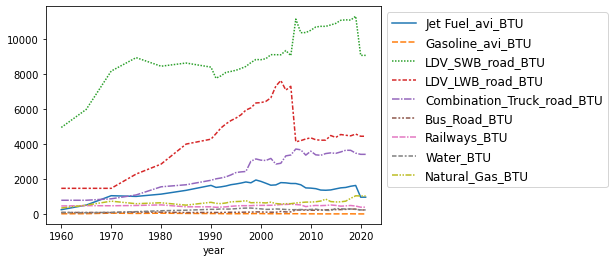

In [11]:
sns.lineplot(data=consumption)
plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12)

Insight
- Highest fuel consumption is long-duty vehicle short-wheel based
- Followed by long-duty vehicle long-wheel based, high usage after 1970, then drop at 2005
- Others increase steadily

Text(0.5, 0, 'Fuel Consumption')

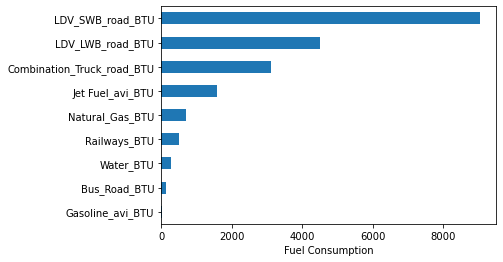

In [38]:
consumption_avg = consumption.median().sort_values(ascending = True)
consumption_avg.plot(kind='barh')
plt.xlabel("Fuel Consumption")

In [39]:
(consumption_avg/consumption_avg.sum())*100

Gasoline_avi_BTU               0.165163
Bus_Road_BTU                   0.675009
Water_BTU                      1.412685
Railways_BTU                   2.478175
Natural_Gas_BTU                3.458968
Jet Fuel_avi_BTU               7.957679
Combination_Truck_road_BTU    15.697018
LDV_LWB_road_BTU              22.623330
LDV_SWB_road_BTU              45.531974
dtype: float64

In [16]:
land_consumption = df[['year',
       'LDV_SWB_road_BTU', 'LDV_LWB_road_BTU', 'Combination_Truck_road_BTU',
       'Bus_Road_BTU', 'Railways_BTU', 'Natural_Gas_BTU']].set_index('year')

Text(0, 0.5, 'Fuel Consumption')

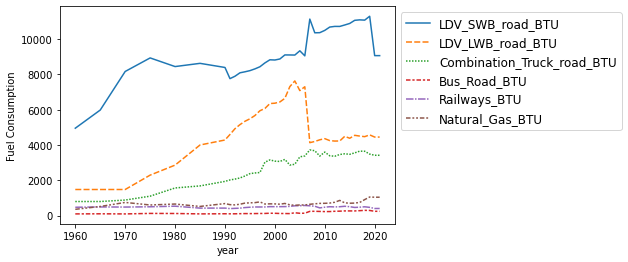

In [17]:
sns.lineplot(data= land_consumption)
plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12)
#plt.xlabel("X axis label")
plt.ylabel("Fuel Consumption")

<AxesSubplot:>

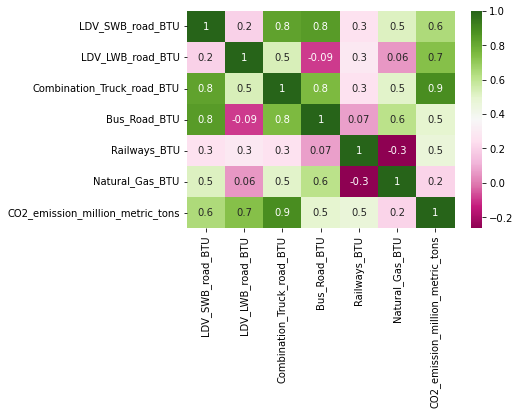

In [21]:
sns.heatmap(df[['LDV_SWB_road_BTU', 'LDV_LWB_road_BTU', 'Combination_Truck_road_BTU',
       'Bus_Road_BTU', 'Railways_BTU', 'Natural_Gas_BTU','CO2_emission_million_metric_tons']].corr(), cmap='PiYG', annot=True, square=False, fmt='.1g')

In [22]:
avi_consumption = df[['year',
        'Jet Fuel_avi_BTU', 'Gasoline_avi_BTU']].set_index('year')

<AxesSubplot:>

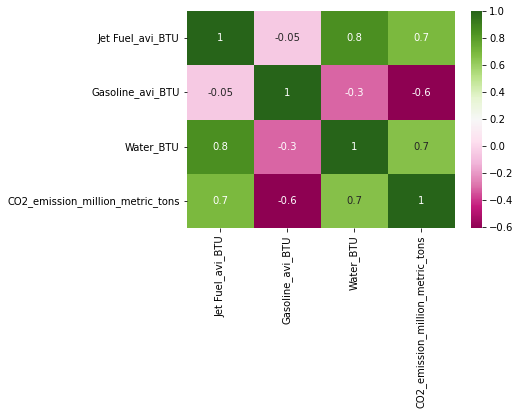

In [23]:
sns.heatmap(df[['Jet Fuel_avi_BTU', 'Gasoline_avi_BTU', 'Water_BTU','CO2_emission_million_metric_tons']].corr(), cmap='PiYG', annot=True, square=False, fmt='.1g')

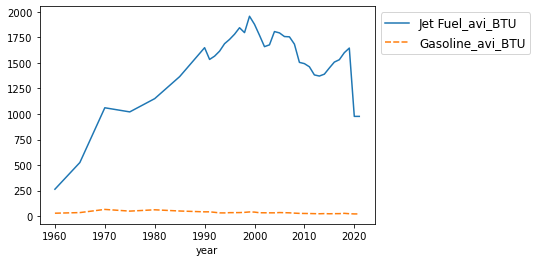

In [22]:
sns.lineplot(data= avi_consumption)
plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12)

Insight
- Jet fuel usage lowest at 1960, then start increasing since 1970
- Gasoline avi highest at 1970, then keep dropping

In [45]:
efficiency = df[['year','LDV_SWB_EFF', 'LDV_LWB_EFF', 'Passenger_Car_EFF', 'Domestic_EFF',
       'Imported_EFF', 'Light_Truck_EFF']].set_index('year')

<AxesSubplot:>

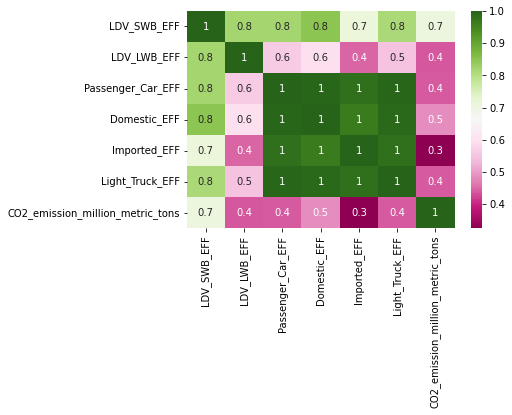

In [40]:
sns.heatmap(df[['LDV_SWB_EFF', 'LDV_LWB_EFF', 'Passenger_Car_EFF', 'Domestic_EFF',
       'Imported_EFF', 'Light_Truck_EFF','CO2_emission_million_metric_tons']].corr(), cmap='PiYG', annot=True, square=False, fmt='.1g')

Text(0, 0.5, 'Fuel Efficiency')

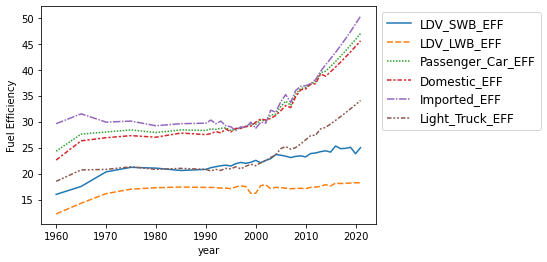

In [46]:
sns.lineplot(data=efficiency)
plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12)
plt.ylabel("Fuel Efficiency")

efficiency increase over the years

In [42]:
efficiency = df[['LDV_SWB_EFF', 'LDV_LWB_EFF', 'Passenger_Car_EFF', 'Domestic_EFF',
       'Imported_EFF', 'Light_Truck_EFF']]

Text(0.5, 0, 'Fuel Efficiency')

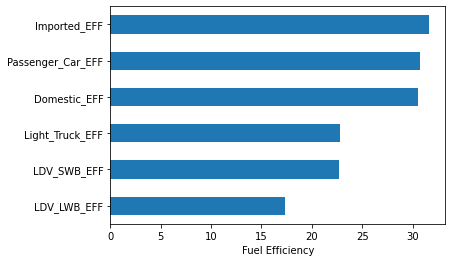

In [43]:
efficiency_avg = efficiency.median().sort_values(ascending = True)
efficiency_avg.plot(kind='barh')
plt.xlabel("Fuel Efficiency")

Efficiency of LDV_LWB_EFF, Light_Truck_EFF and LDV_SWB_EFF are among the lowest, so contribute to higher C02 emission compared to the rest

In [25]:
age = df[['year','Passenger_Car_Age',
       'Light_Truck_Age', 'Light_vehicle_Age']].set_index('year')

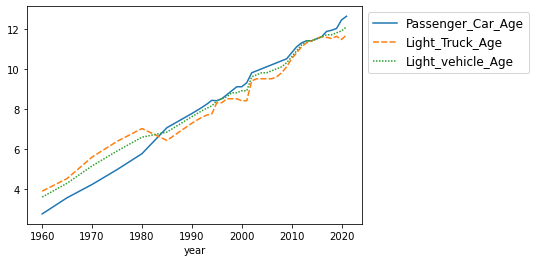

In [26]:
sns.lineplot(data=age)
plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12)

In [19]:
pd.pivot_table(df, index = 'Passenger_Car_EFF', values = 'CO2_emission_million_metric_tons').sort_values('CO2_emission_million_metric_tons', ascending = False)

,CO2_emission_million_metric_tons
Passenger_Car_EFF,
33.126479,2026.325000
33.937919,2023.293000
32.900238,1992.366000
31.469337,1971.599000
44.714388,1923.853000
43.643421,1917.760000
31.242083,1916.584000
30.087723,1898.731000
35.270757,1895.531000


<AxesSubplot:xlabel='Passenger_Car_Age', ylabel='Passenger_Car_EFF'>

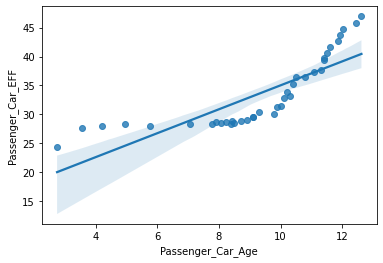

In [27]:
sns.regplot(data=df, x='Passenger_Car_Age', y='Passenger_Car_EFF')

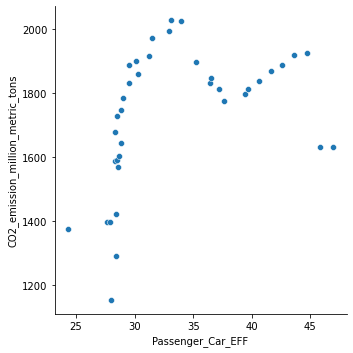

In [28]:
sns.relplot(data=df, x='Passenger_Car_EFF', y='CO2_emission_million_metric_tons')

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


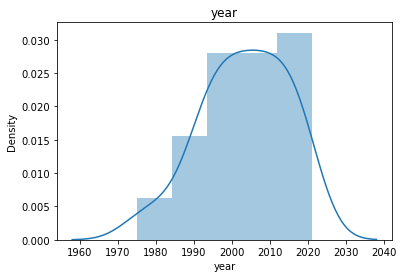

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


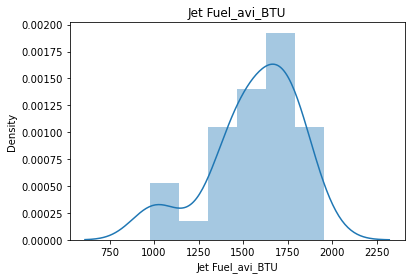

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


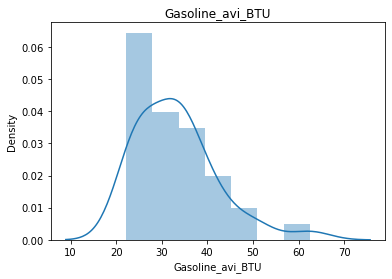

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


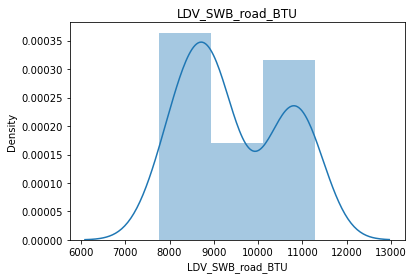

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


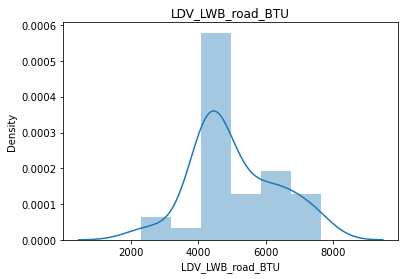

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


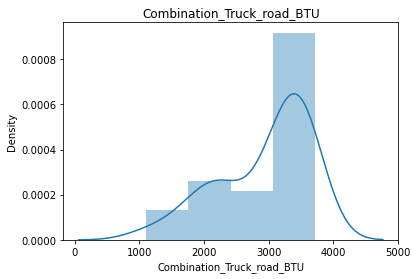

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


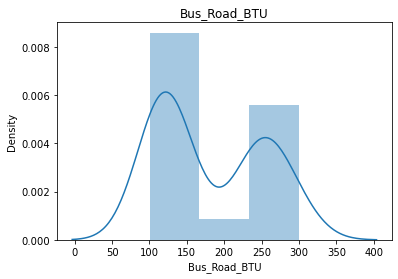

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


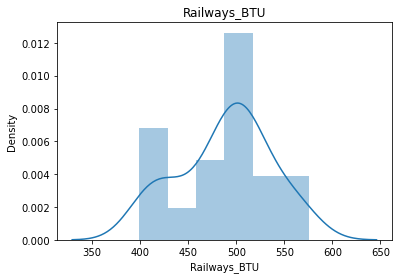

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


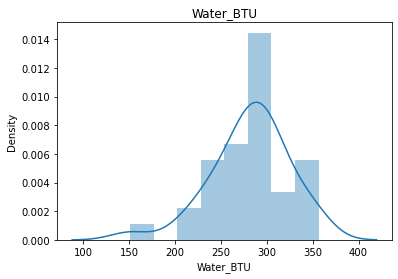

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


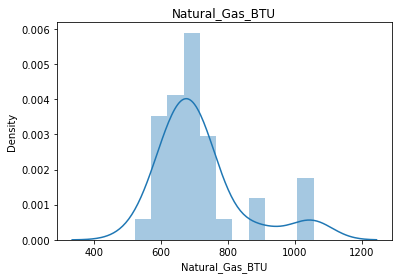

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


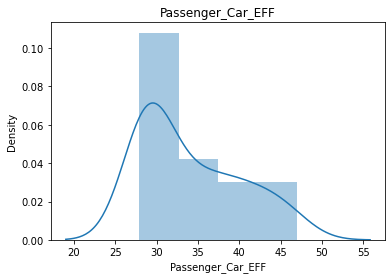

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


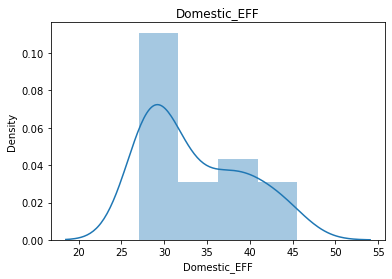

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


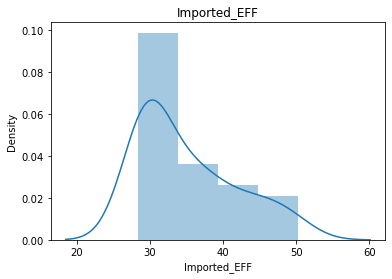

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


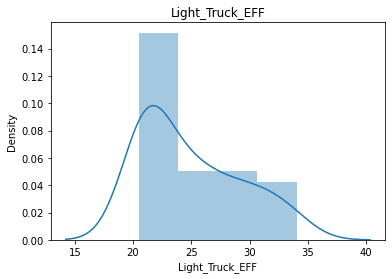

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


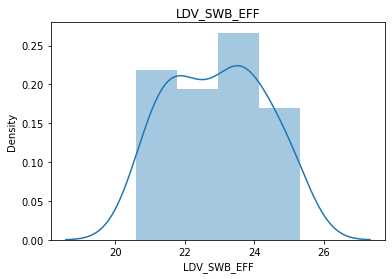

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


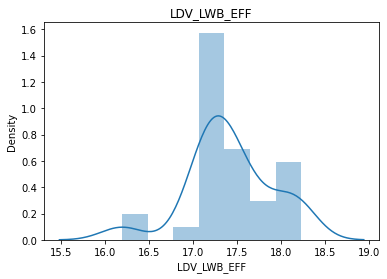

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


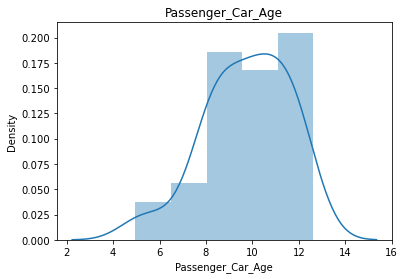

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


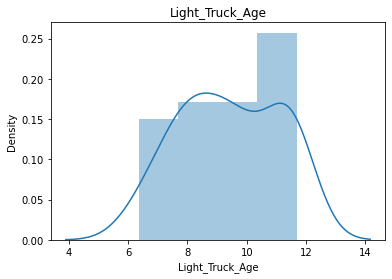

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


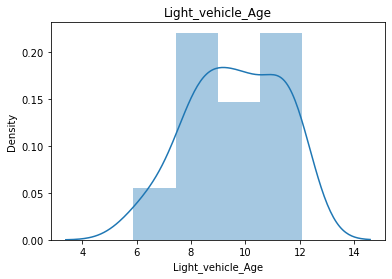

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


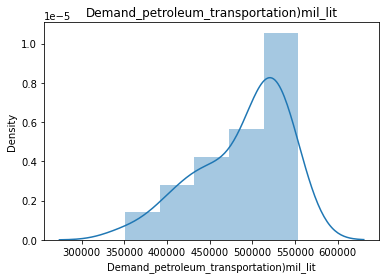

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


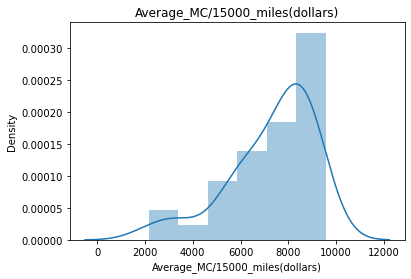

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


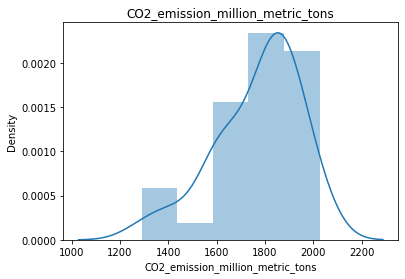

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


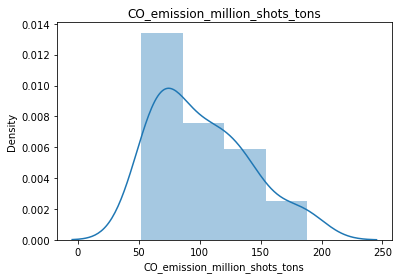

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


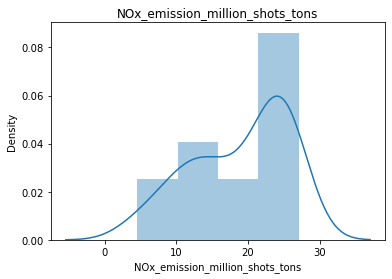

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


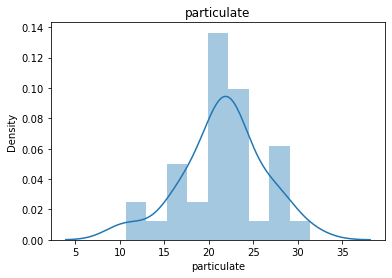

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


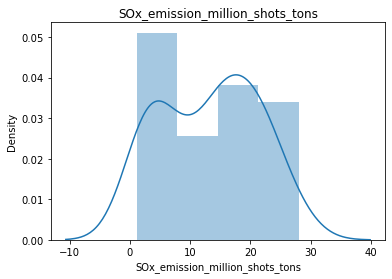

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


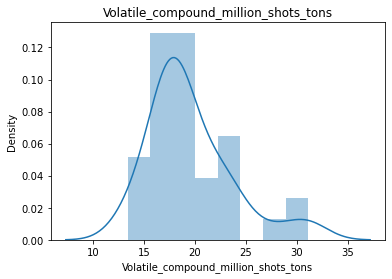

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


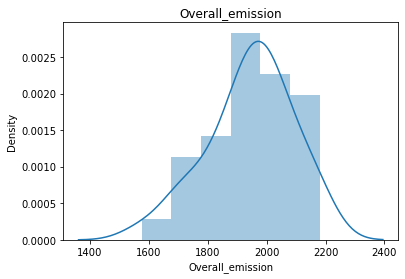

In [18]:
for i in df2.columns:
    sns.distplot(df2[i])
    plt.title(i)
    plt.show()

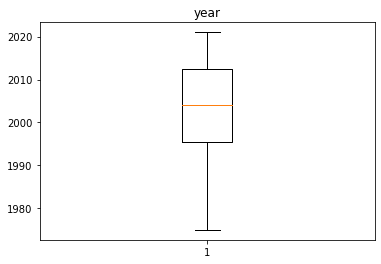

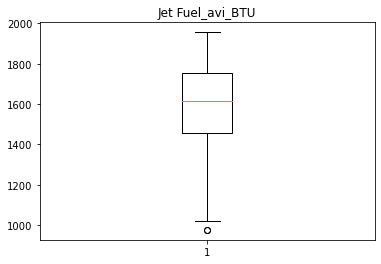

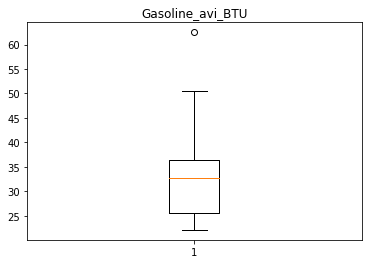

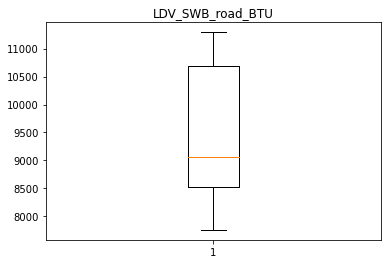

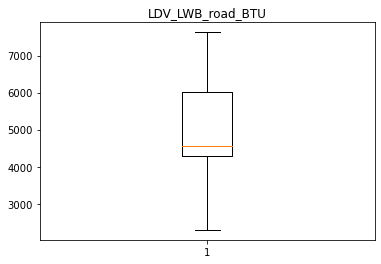

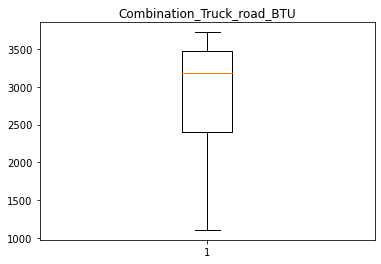

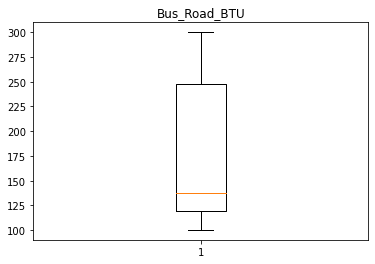

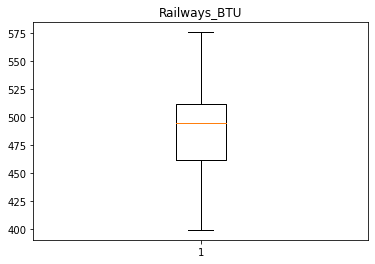

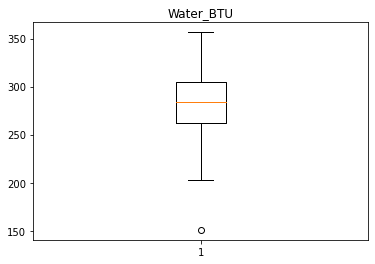

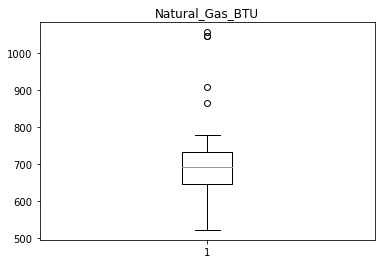

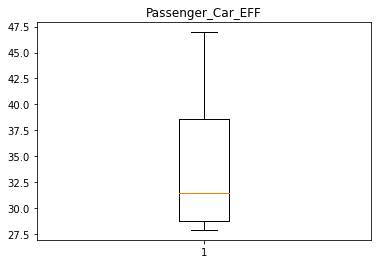

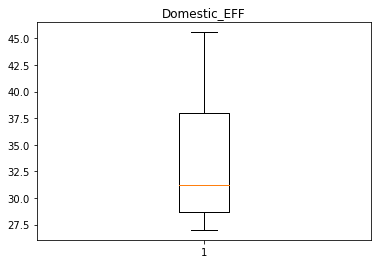

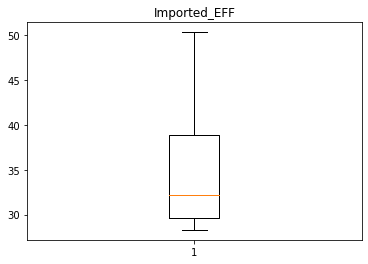

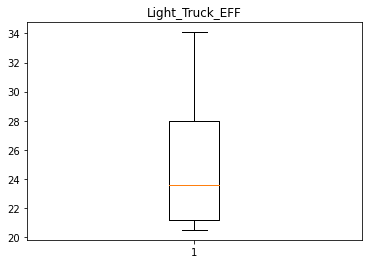

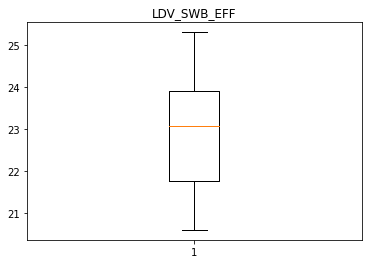

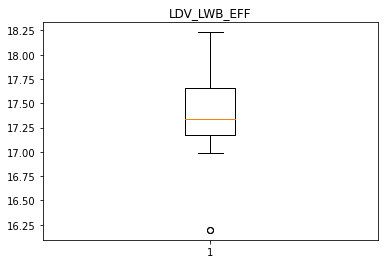

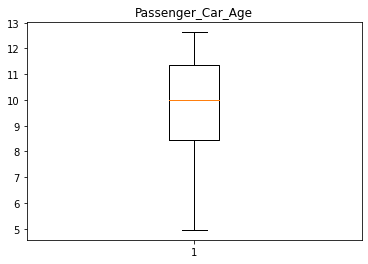

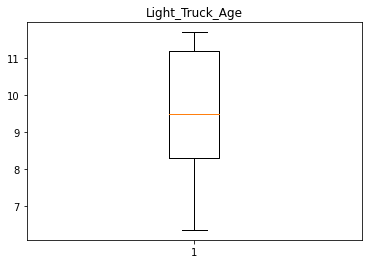

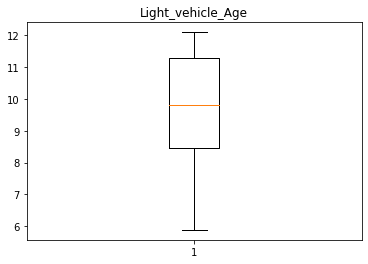

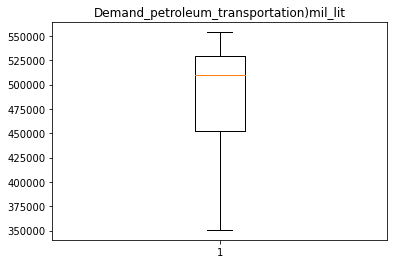

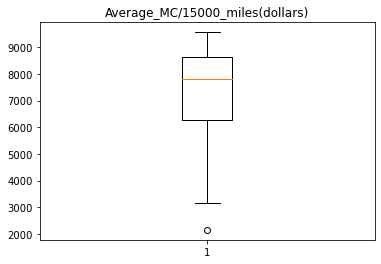

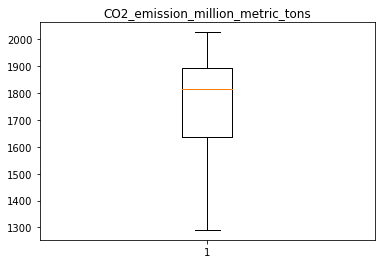

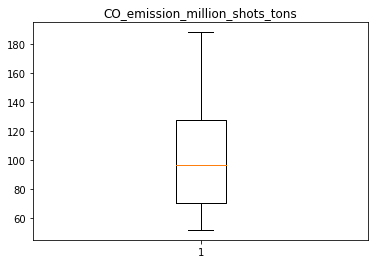

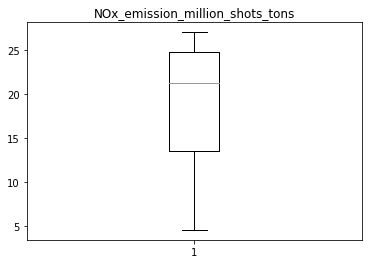

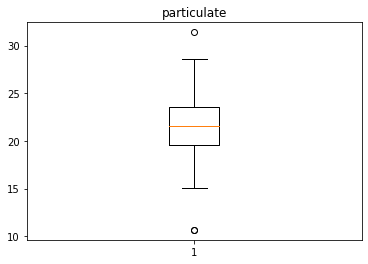

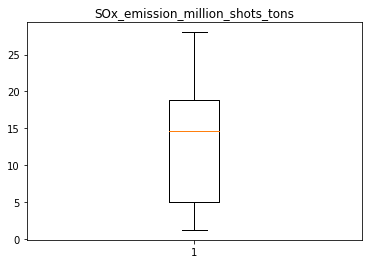

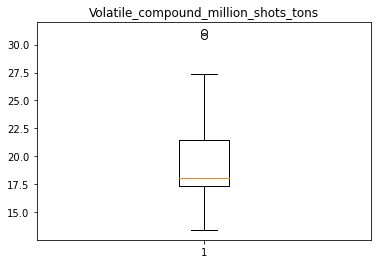

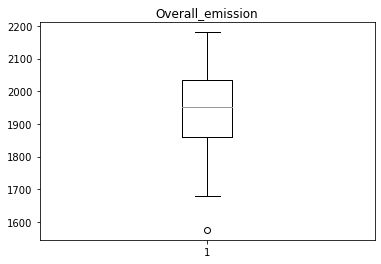

In [17]:
for i in df2.columns:
    plt.boxplot(df2[i])
    plt.title(i)
    plt.show()

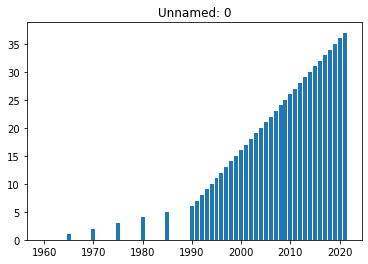

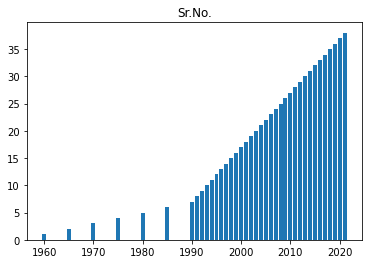

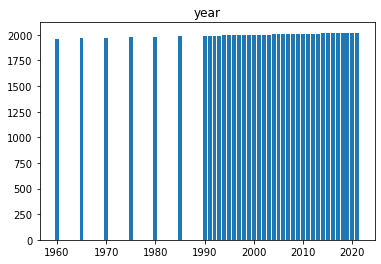

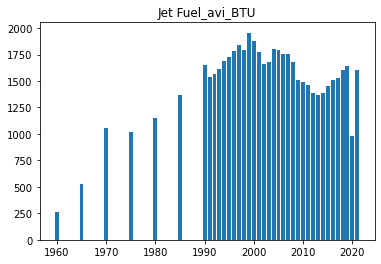

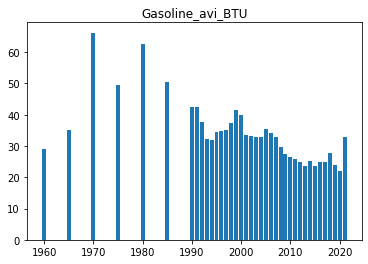

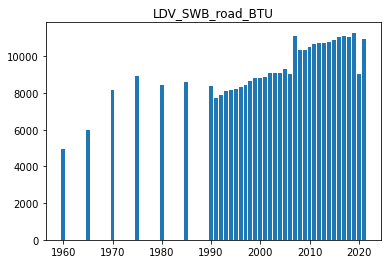

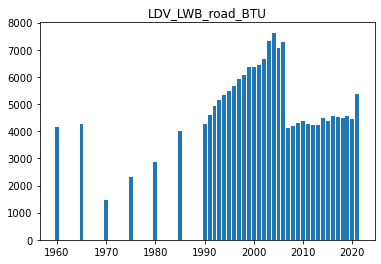

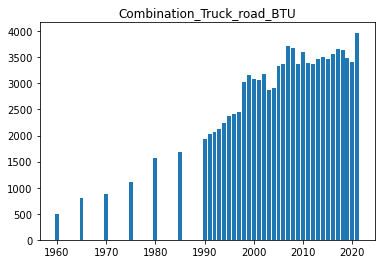

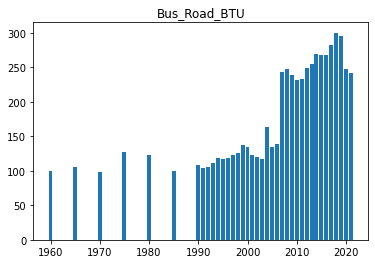

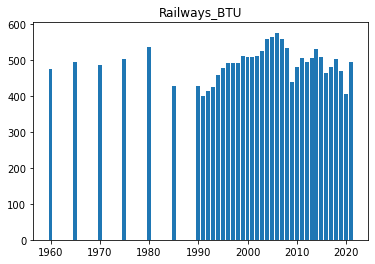

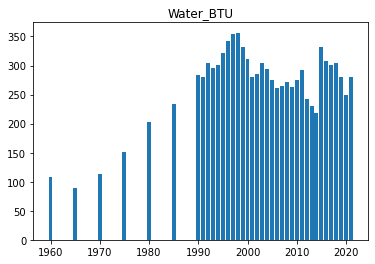

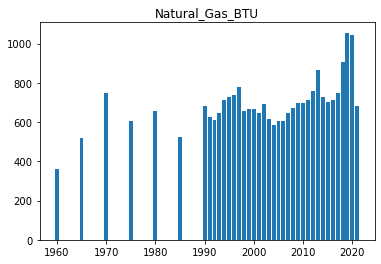

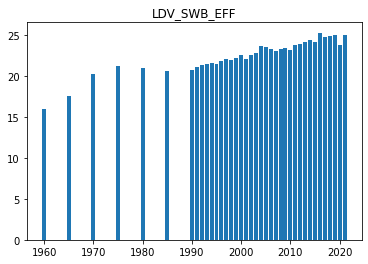

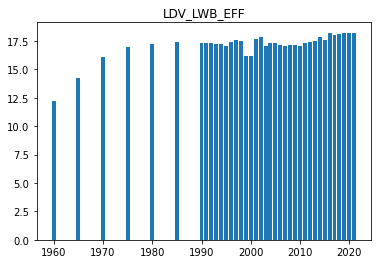

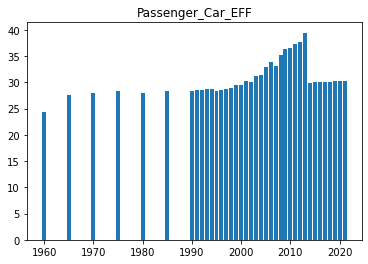

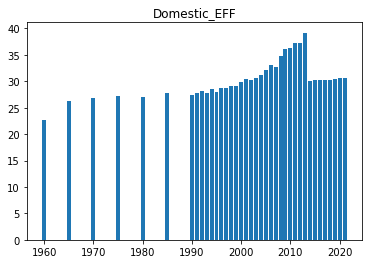

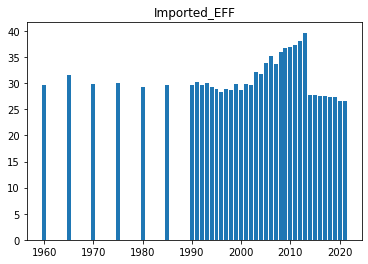

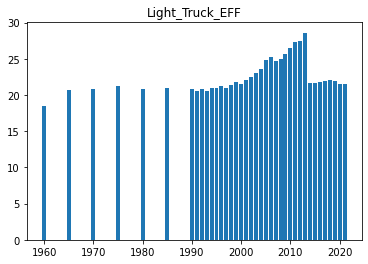

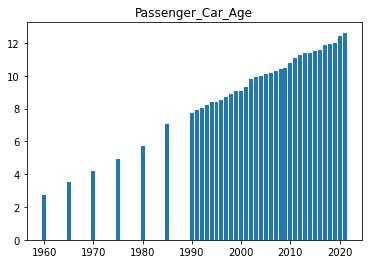

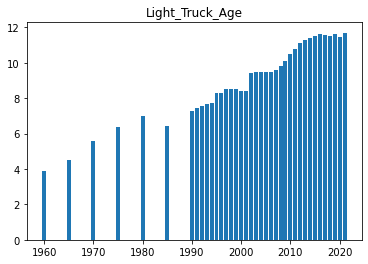

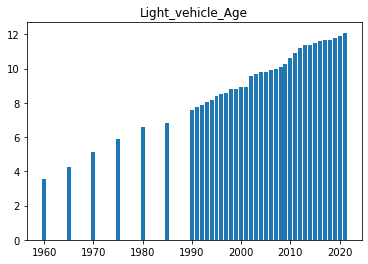

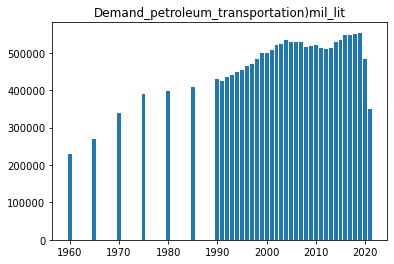

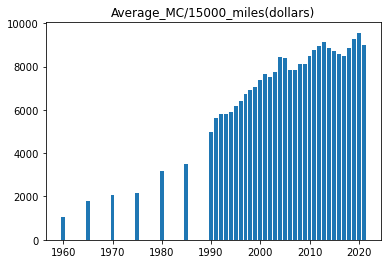

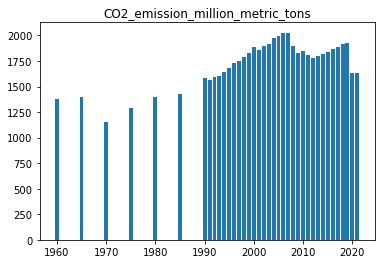

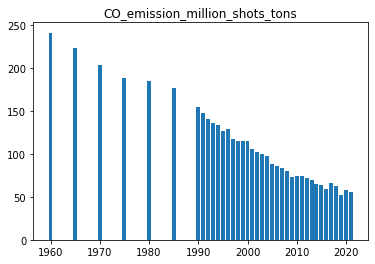

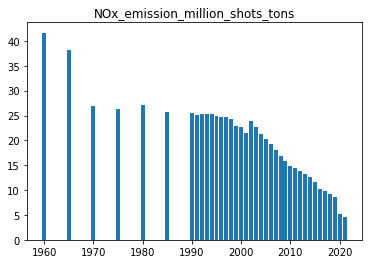

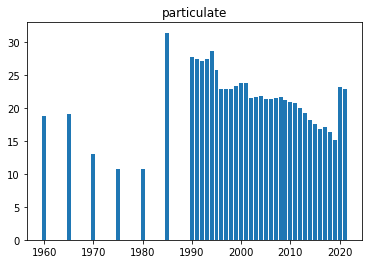

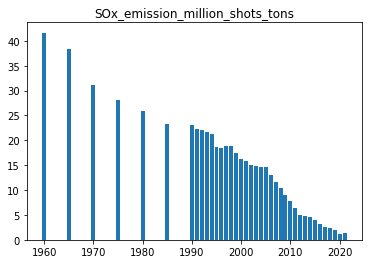

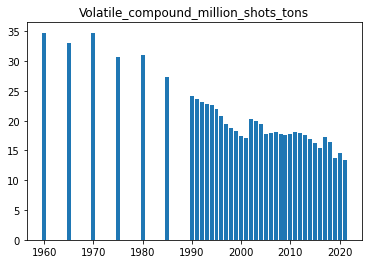

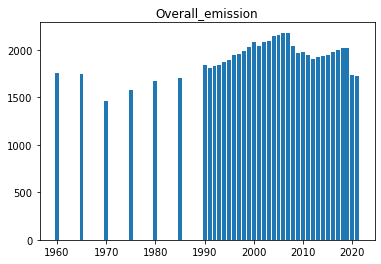

In [3]:
for i in df.columns:
    plt.bar(x = (df['year']),height=(df[i]))
    plt.title(i)
    plt.show()

Insight
- All vehicle give increament until reach highest CO2 emission when efficiency around median of their value, then emission drop.
Why?

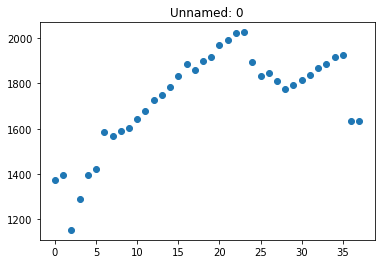

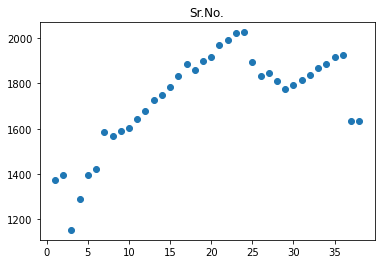

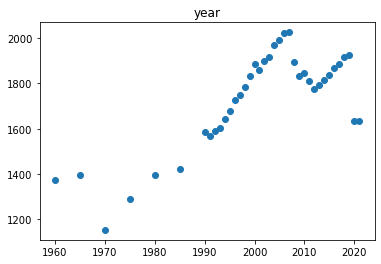

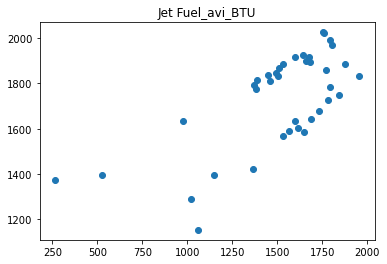

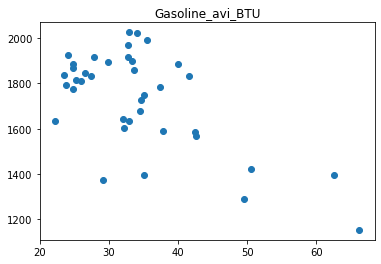

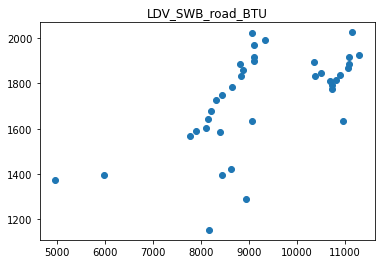

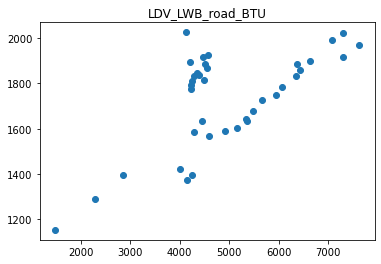

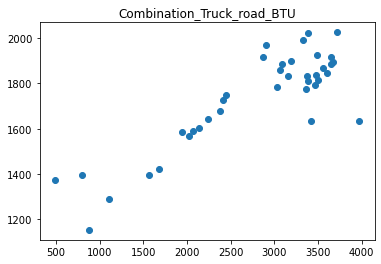

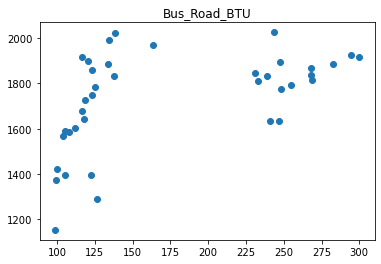

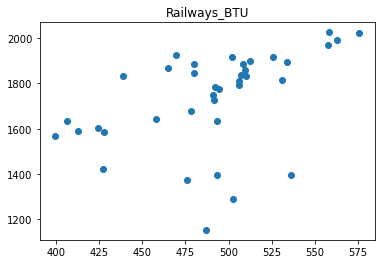

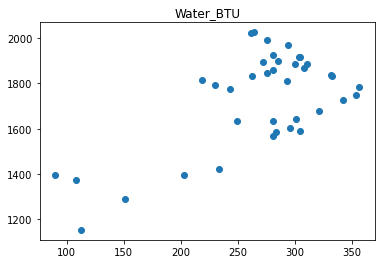

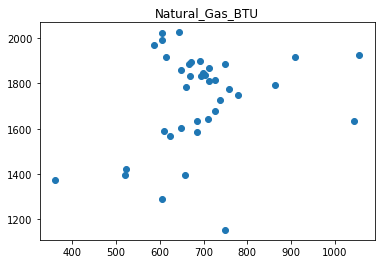

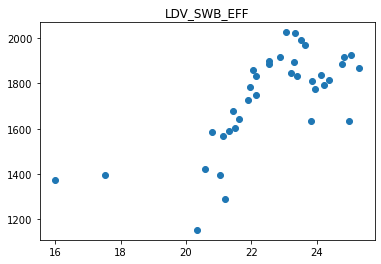

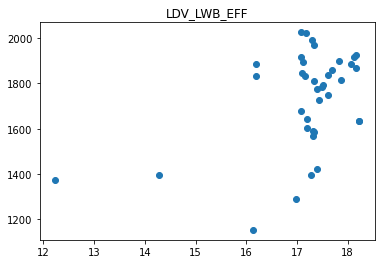

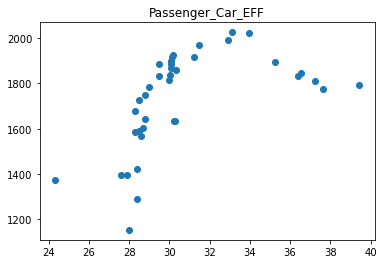

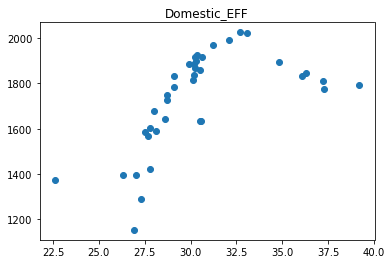

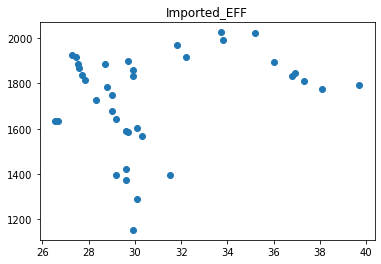

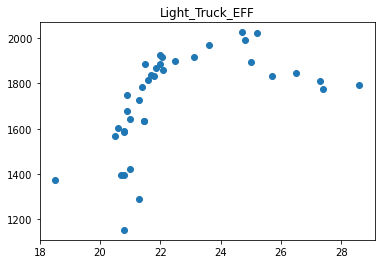

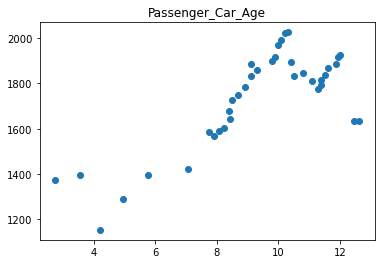

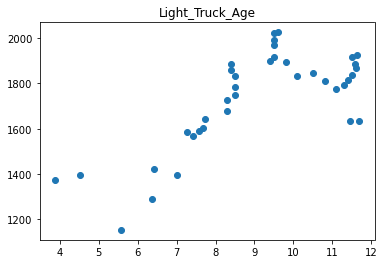

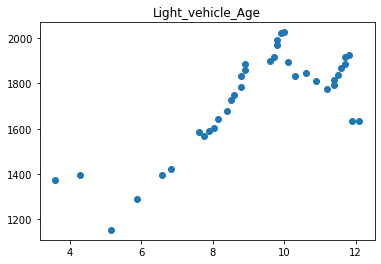

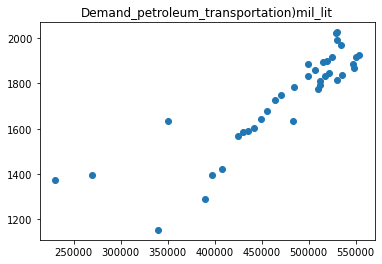

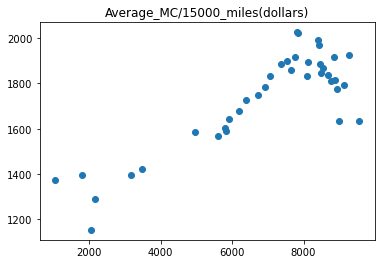

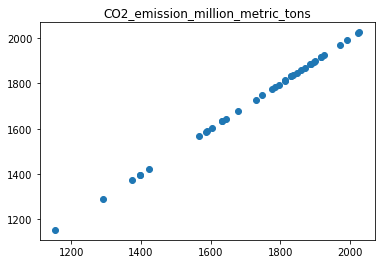

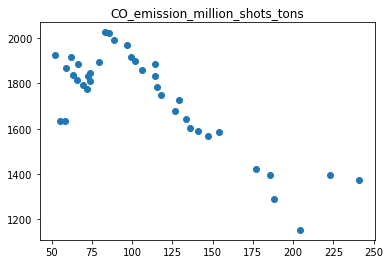

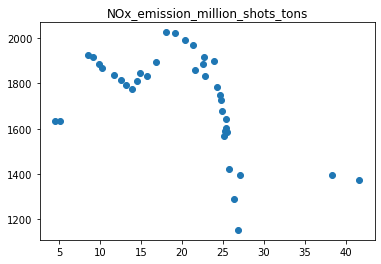

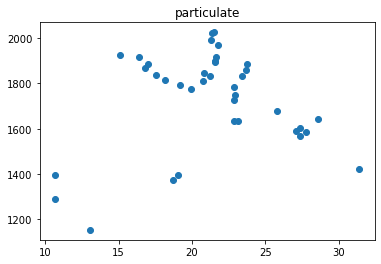

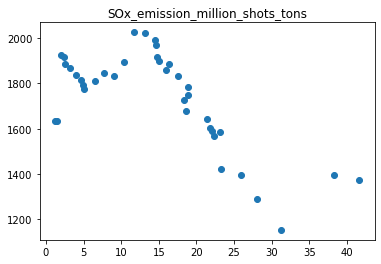

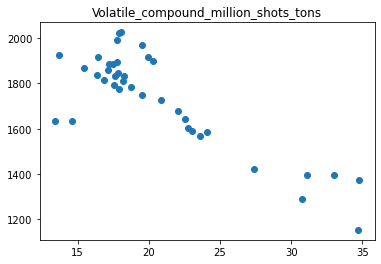

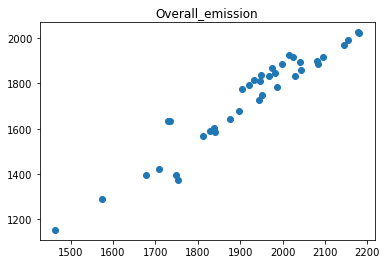

In [43]:
for i in df.columns:
    plt.scatter(x = (df[i]),y=df['CO2_emission_million_metric_tons'])
    plt.title(i)
    plt.show()
#plt.scatter(x=(cars['HP']),y=cars['MPG'],color='blue')

In [51]:
data = data.drop(['CO_emission_million_shots_tons', 'NOx_emission_million_shots_tons',
       'particulate', 'SOx_emission_million_shots_tons',
       'Volatile_compound_million_shots_tons', 'Overall_emission'],axis = 1)

In [47]:
data = data.drop(['year'],axis = 1)

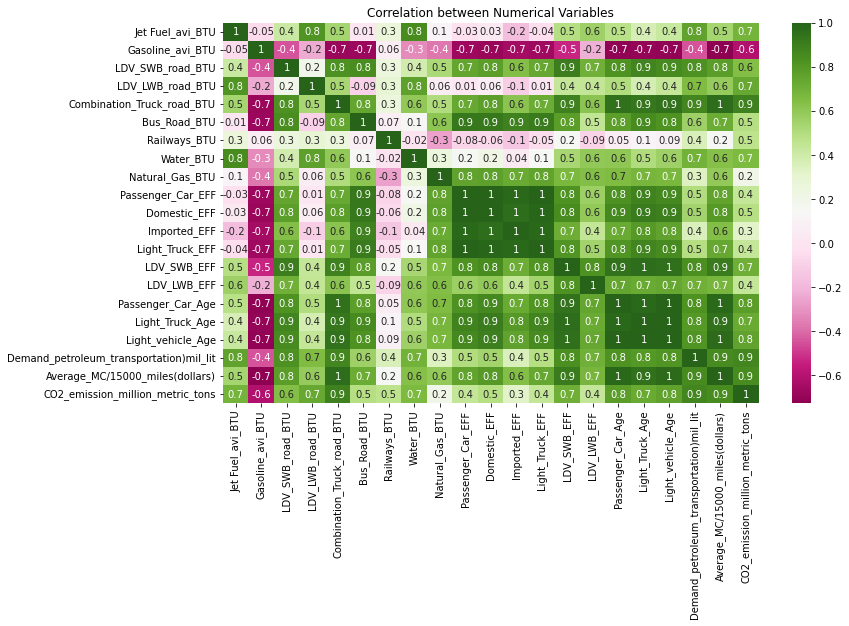

In [52]:
corr_matrix = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False, fmt='.1g')
plt.title('Correlation between Numerical Variables');

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                                    feature           VIF
0                                      year  7.796457e+04
1                          Jet Fuel_avi_BTU  2.296309e+03
2                          Gasoline_avi_BTU  3.464672e+02
3                          LDV_SWB_road_BTU  5.686577e+03
4                          LDV_LWB_road_BTU  9.506202e+02
5                Combination_Truck_road_BTU  2.080312e+03
6                              Bus_Road_BTU  7.114449e+02
7                              Railways_BTU  1.791596e+03
8                                 Water_BTU  5.590067e+02
9                           Natural_Gas_BTU  7.074690e+02
10                        Passenger_Car_EFF  1.223091e+06
11                             Domestic_EFF  5.376395e+05
12                             Imported_EFF  1.890857e+05
13                          Light_Truck_EFF  3.663182e+04
14                              LDV_SWB_EFF  2.694208e+04
15                              LDV_LWB_EFF  4.407467e+03
16            

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [57]:
df.skew()

Unnamed: 0                                 0.000000
Sr.No.                                     0.000000
year                                      -0.939392
Jet Fuel_avi_BTU                          -1.862803
Gasoline_avi_BTU                           1.572702
LDV_SWB_road_BTU                          -0.651696
LDV_LWB_road_BTU                          -0.037778
Combination_Truck_road_BTU                -0.990633
Bus_Road_BTU                               0.483246
Railways_BTU                              -0.288019
Water_BTU                                 -1.428626
Natural_Gas_BTU                            0.807862
LDV_SWB_EFF                               -1.271898
LDV_LWB_EFF                               -3.095058
Passenger_Car_EFF                          1.080623
Domestic_EFF                               0.746477
Imported_EFF                               1.084546
Light_Truck_EFF                            1.135532
Passenger_Car_Age                         -1.026657
Light_Truck_

In [60]:
def norm_func(i):
    x = (i-i.min())/ (i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_n = norm_func(df.iloc[:,1:])

In [61]:
df_n.skew()

Sr.No.                                     0.000000
year                                      -0.939392
Jet Fuel_avi_BTU                          -1.862803
Gasoline_avi_BTU                           1.572702
LDV_SWB_road_BTU                          -0.651696
LDV_LWB_road_BTU                          -0.037778
Combination_Truck_road_BTU                -0.990633
Bus_Road_BTU                               0.483246
Railways_BTU                              -0.288019
Water_BTU                                 -1.428626
Natural_Gas_BTU                            0.807862
LDV_SWB_EFF                               -1.271898
LDV_LWB_EFF                               -3.095058
Passenger_Car_EFF                          1.080623
Domestic_EFF                               0.746477
Imported_EFF                               1.084546
Light_Truck_EFF                            1.135532
Passenger_Car_Age                         -1.026657
Light_Truck_Age                           -0.565219
Light_vehicl

Skewness barely improved after normalization